In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text,ax_text
from matplotlib.colors import LinearSegmentedColormap,Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec

from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import json
import os

In [122]:
plt.style.use('./assets/stylesheets/soc_base.mplstyle')

In [123]:
f = open('data/brighton_vs_leicester.json', encoding='utf-8')
data = json.load(f)

In [124]:
players = [
    {
        'name': 'Solly March',
        'whoscored_id': '122926',
        'country_id': 'eng'
    },
    {
        'name': 'Pascal Groß',
        'whoscored_id': '71824',
        'country_id': 'ger'
    },
    {
        'name': 'Alexis Mac Allister',
        'whoscored_id': '345319',
        'country_id': 'arg'
    },
    {
        'name': 'Moisés Caicedo',
        'whoscored_id': '410175',
        'country_id': 'ecu'
    },
    {
        'name': 'Leandro Trossard',
        'whoscored_id': '113994',
        'country_id': 'bel'
    },
    {
        'name': 'Enock Mwepu',
        'whoscored_id': '353191',
        'country_id': 'zam'
    },
]


In [125]:
data_list = []
for player in players:
    for d in data['events']:
        try:
            if(d['playerId']==int(player['whoscored_id'])) & (d['isTouch']):
                data_list.append(d)
        except:
            continue

In [126]:
x_ = [x['x'] for x in data_list]
y_ = [y['y'] for y in data_list]
playerId = [p['playerId'] for p in data_list]

data = pd.DataFrame({'y':x_,'x':y_,'playerId':playerId})

In [127]:
data_test = data[data['playerId'] == 122926].reset_index(drop=True)

In [128]:
colors = [
    '#efe9e6',
    '#e9e1dd',
    '#e3dad3',
    '#dcd3c9',
    '#d4ccc0',
    '#ccc6b7',
    '#c3bfae',
    '#bab9a6',
    '#b0b39e',
    '#a6ad96',
    '#9ba790',
    '#90a18a',
    '#849b84',
    '#789680',
    '#6c907c',
    '#608a79',
    '#538476',
    '#467e74',
    '#387872',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
# cm.register_cmap(name='SOC', cmap=soc_cm)

<AxesSubplot: >

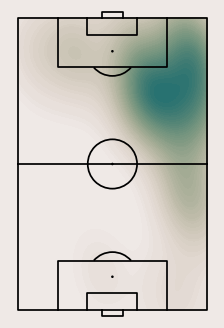

In [129]:
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box',
    linewidth=1.25,
    line_color='black'
)
pitch.draw(ax=ax)

pitch.kdeplot(
    data_test.y, data_test.x,
    ax=ax, fill=True,
    levels=100, shade_lowest=True,
    cut=4, zorder=-1, cmap='SOC'
)
# ax.scatter(data_test.x,data_test.y,s=20,alpha=.2,lw=1.5,color='#287271')

In [130]:
def plot_kdetouches(ax, fig, playerId, countryId, playerName, df=data):
    data = df.copy()
    data_player = data[data['playerId'] ==
                       int(playerId)].reset_index(drop=True)
    total_touches = data_player.shape[0]
    touches_third = data_player[data_player['y']
                                >= (100*2)/3].shape[0]/total_touches
    pitch = VerticalPitch(
        pitch_type='opta',
        goal_type='box',
        linewidth=1.25,
        line_color='black'
    )
    pitch.draw(ax=ax)

    pitch.kdeplot(
        data_player.y, data_player.x,
        ax=ax, fill=True,
        levels=100, shade_lowest=True,
        cut=4, zorder=-1, cmap='SOC'
    )
    # ax.scatter(data_player.x, data_player.y, s=10,
    #            alpha=.2, lw=1.5, color='#287271')

    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    def DC_to_NFC(x): return FC_to_NFC(DC_to_FC(x))

    ax_coords = DC_to_NFC((15, 109))
    ax_size = .018

    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    whoscored_url = 'https://d2zywfiolv4f83.cloudfront.net/img/players/'
    player_face = Image.open(urllib.request.urlopen(
        f"{fotmob_url}{countryId}.png"))
    # player_face = Image.open(urllib.request.urlopen(
    #     f"{whoscored_url}{playerId}.jpg"))
    image_ax.imshow(player_face)
    image_ax.axis("off")
    ax_text(
        x=95, y=115,
        s=f'{playerName}\n<touches {total_touches:.0f} | final third: {touches_third:.0%}>',
        highlight_textprops=[{'size': 7, 'weight': 'normal'}],
        ax=ax, weight='bold', size=10, font='DM Sans', ha='left'
    )

    return ax


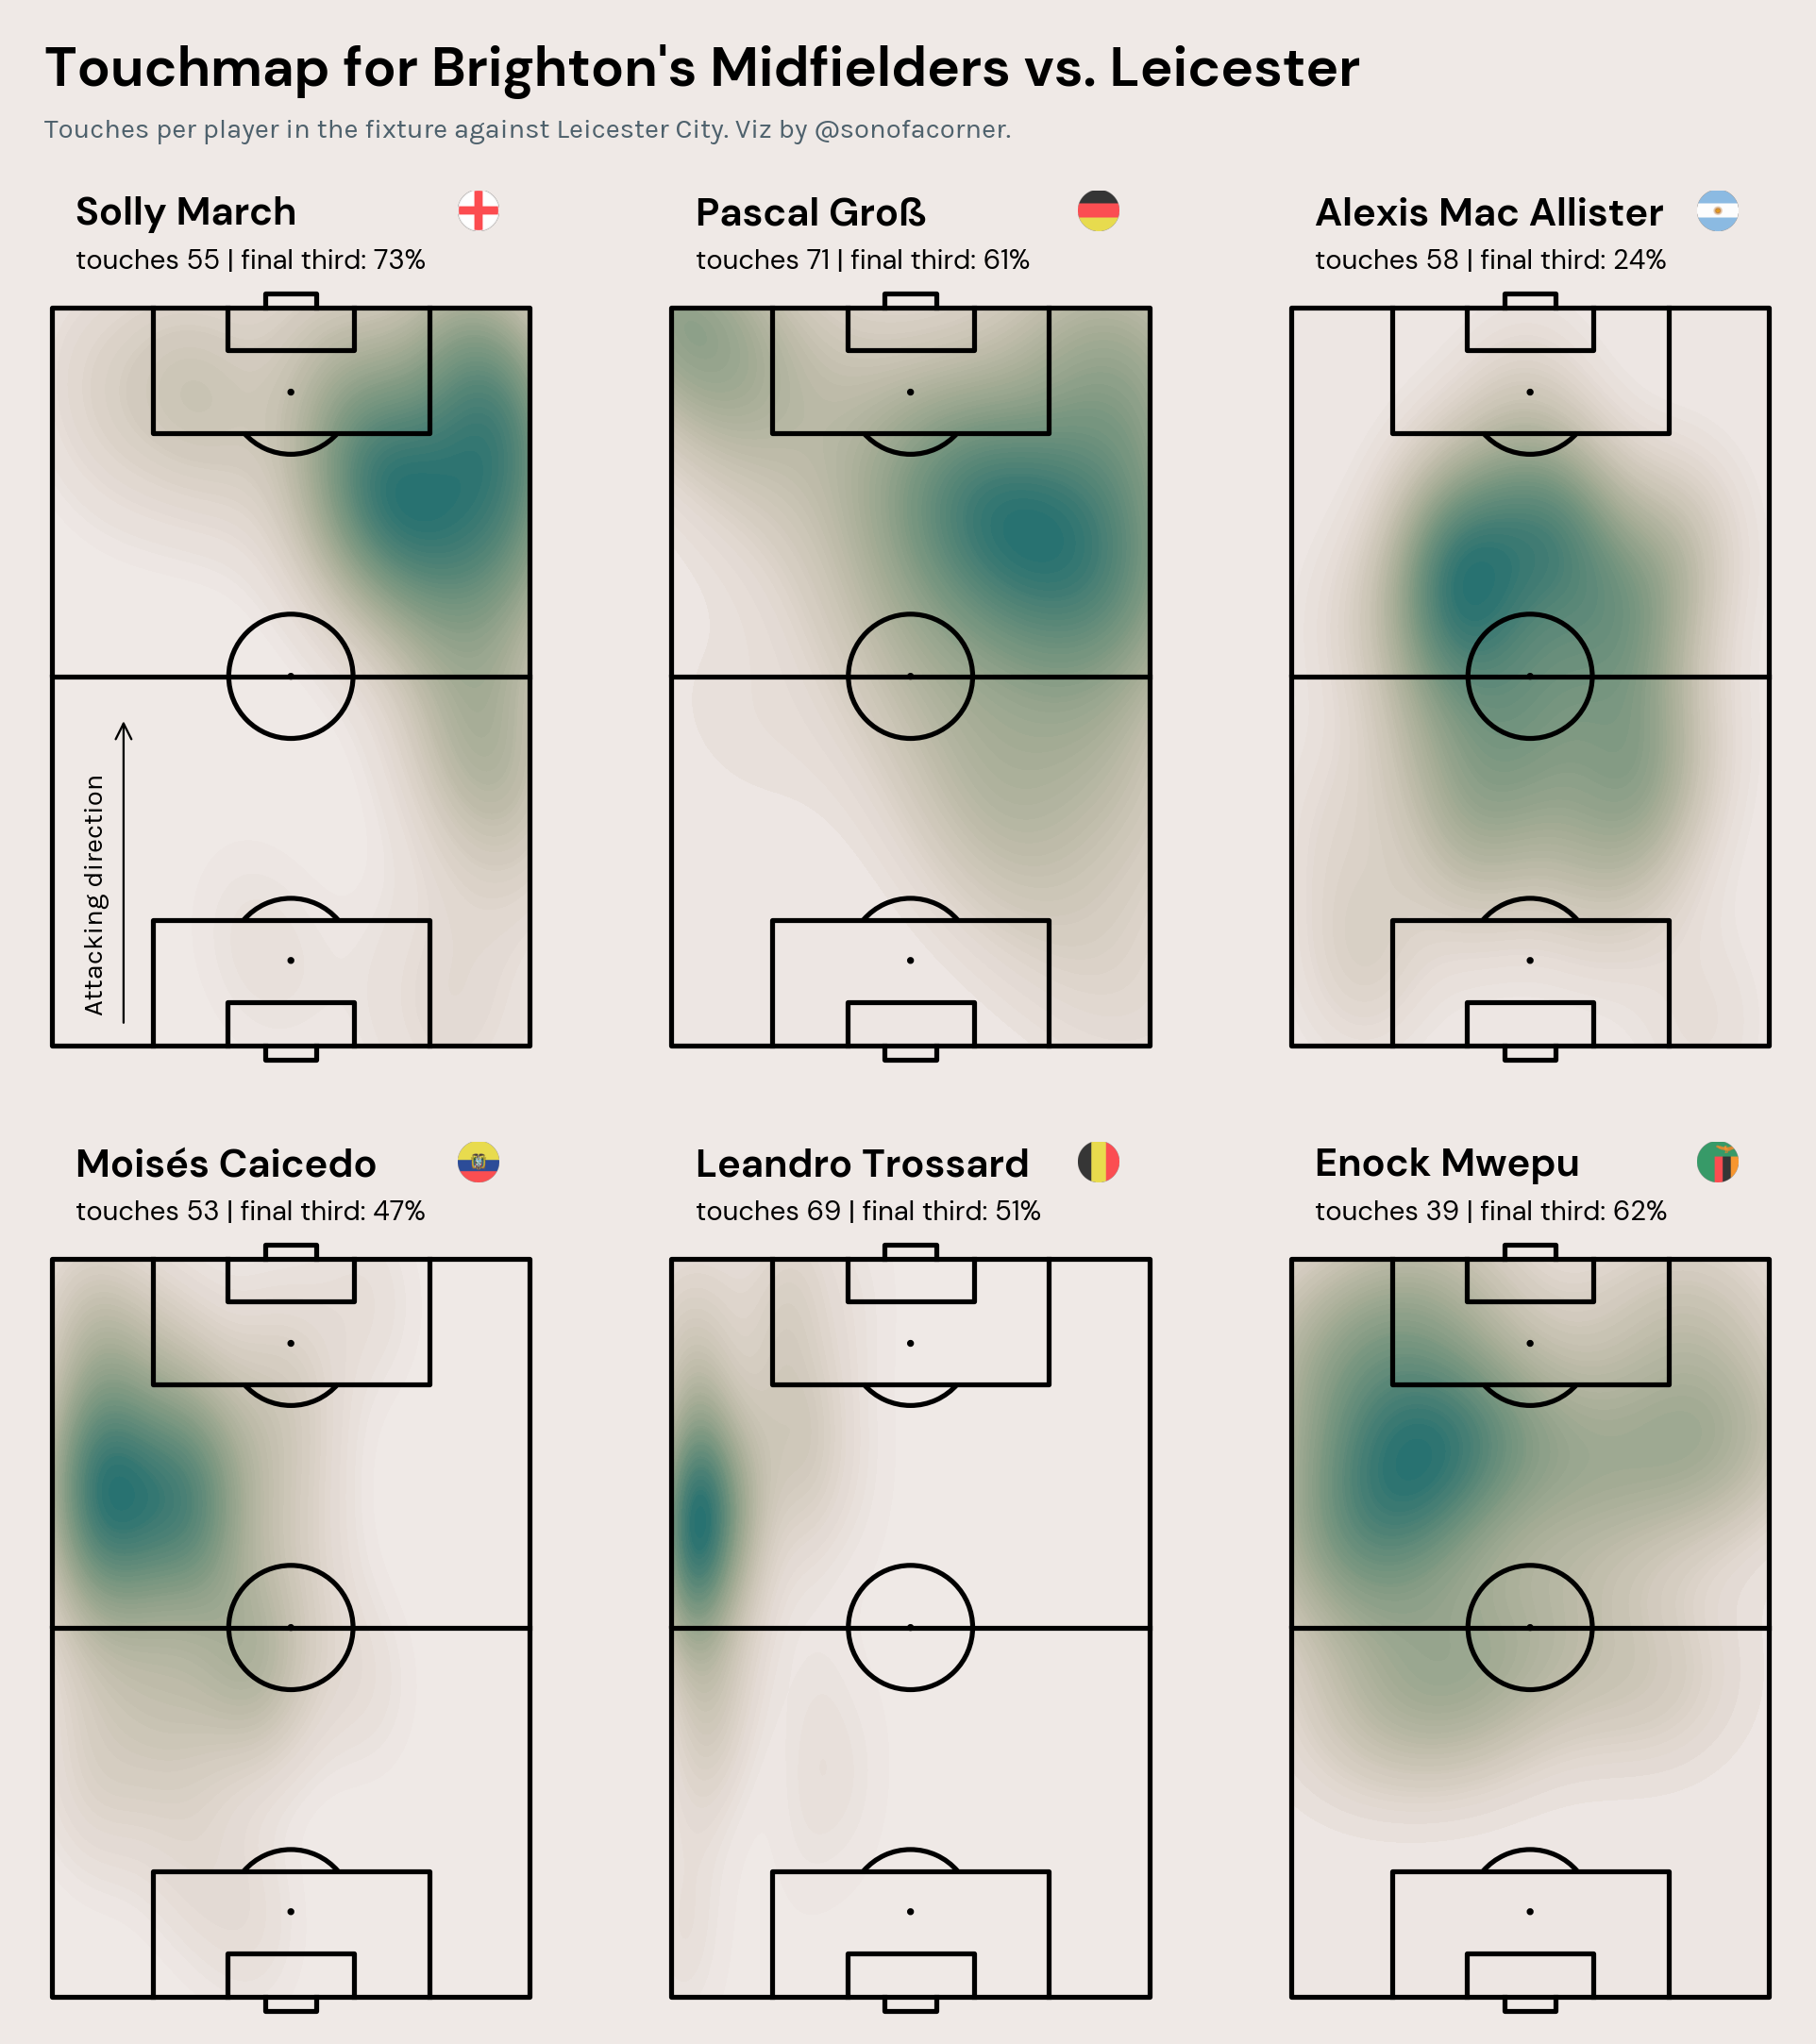

In [131]:
layout_ = '''
    ABC
    DEF
'''

fig = plt.figure(figsize=(8, 8), dpi=300)
axs = fig.subplot_mosaic(layout_)

counter = 0
for k, ax in axs.items():
    playerId = players[counter]['whoscored_id']
    countryId = players[counter]['country_id']
    playerName = players[counter]['name']
    plot_kdetouches(ax, fig, playerId, countryId, playerName)
    counter += 1

axs['A'].annotate(
    xy=(93, 5),
    text='Attacking direction',
    rotation=90,
    size=7
)

axs['A'].annotate(
    xy=(85, 2),
    xytext=(85, 45),
    text='',
    arrowprops=dict(arrowstyle='<-', linewidth=.55)
)
fig_text(
    x=0.13, y=.96,
    s="Touchmap for Brighton's Midfielders vs. Leicester",
    va="bottom", ha="left",
    fontsize=14, color="black", font="DM Sans", weight="bold"
)
fig_text(
    x=0.13, y=.94,
    s="Touches per player in the fixture against Leicester City. Viz by @sonofacorner.",
    va="bottom", ha="left",
    fontsize=7, color="#4E616C", font="Karla"
)
